In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('county_statistics.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Unnamed: 0,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,total_votes20,votes20_Donald_Trump,votes20_Joe_Biden,lat,long,cases,deaths,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0,Abbeville,SC,0.629,0.346,10724.0,6742.0,3712.0,0.661,0.330,12433.0,8215.0,4101.0,34.223334,-82.461707,805.0,17.0,24788.0,12044.0,12744.0,1.3,68.9,27.6,0.1,0.3,0.0,19452.0,35254.0,2259.0,19234.0,799.0,22.7,32.1,27.2,20.7,20.8,10.6,20.7,78.3,11.1,0.5,1.8,1.8,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4
1,1,Acadia,LA,0.773,0.206,27386.0,21159.0,5638.0,0.795,0.191,28425.0,22596.0,5443.0,30.295065,-92.414197,3182.0,102.0,62607.0,30433.0,32174.0,2.4,77.5,17.6,0.1,0.1,0.0,45197.0,40492.0,2544.0,21591.0,1002.0,21.5,27.6,27.6,16.9,25.7,15.0,14.8,83.2,10.3,0.2,1.6,2.2,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9
2,2,Accomack,VA,0.545,0.428,15755.0,8582.0,6737.0,0.542,0.447,16938.0,9172.0,7578.0,37.767072,-75.632346,1227.0,19.0,32840.0,16079.0,16761.0,8.8,60.3,28.3,0.3,0.7,0.0,24408.0,42260.0,2253.0,24266.0,1564.0,19.8,31.8,31.1,17.7,18.8,15.1,17.3,80.0,10.6,0.5,2.6,1.8,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4
3,3,Ada,ID,0.479,0.387,195587.0,93748.0,75676.0,0.504,0.465,259389.0,130699.0,120539.0,43.452658,-116.241552,17451.0,181.0,435117.0,217999.0,217118.0,7.9,85.2,1.2,0.4,2.6,0.1,316189.0,60151.0,1294.0,31642.0,725.0,11.8,13.1,43.0,16.6,25.0,6.9,8.4,80.7,7.7,0.5,1.5,2.8,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3
4,4,Adair,IA,0.653,0.300,3759.0,2456.0,1127.0,0.697,0.286,4183.0,2917.0,1197.0,41.330756,-94.471059,222.0,1.0,7192.0,3552.0,3640.0,1.7,96.6,0.3,0.0,0.4,0.0,5572.0,49477.0,2633.0,28861.0,2055.0,9.5,12.1,28.2,16.9,20.0,17.3,17.6,77.9,12.4,0.3,2.8,0.4,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4867 entries, 0 to 4866
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    4867 non-null   int64  
 1   county                        4867 non-null   object 
 2   state                         4867 non-null   object 
 3   percentage16_Donald_Trump     3111 non-null   float64
 4   percentage16_Hillary_Clinton  3111 non-null   float64
 5   total_votes16                 3111 non-null   float64
 6   votes16_Donald_Trump          3111 non-null   float64
 7   votes16_Hillary_Clinton       3111 non-null   float64
 8   percentage20_Donald_Trump     4490 non-null   float64
 9   percentage20_Joe_Biden        4490 non-null   float64
 10  total_votes20                 4633 non-null   float64
 11  votes20_Donald_Trump          4633 non-null   float64
 12  votes20_Joe_Biden             4633 non-null   float64
 13  lat

## Cleaning the data

we don't have data of 2016 voting trend for 1522 counties. So we can use them to predict how vote share changes because of covid and other factors. That's why I am going to drop them.

In [6]:
df.dropna(inplace=True, axis=0)

In [7]:
# convert some cols to percentages to remove any implicit dependence on other variables

df["turnout_change"] = df["total_votes20"] - df["total_votes16"]
df["perc_turnout_change"] = df["turnout_change"] / df["TotalPop"]

df["trump_change"] = df["percentage20_Donald_Trump"] - df["percentage16_Donald_Trump"]
df["dem_change"] = df["percentage20_Joe_Biden"] - df["percentage16_Hillary_Clinton"]

df["case_rate"] = df["cases"] / df["TotalPop"]
df["death_rate"] = df["deaths"] / df["cases"]

df['Men_Ratio'] = df['Men'] / df['TotalPop']
df['Employed%'] = df['Employed'] / df['TotalPop']

df['majority'] = df[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']].idxmax(axis=1)

## EDA

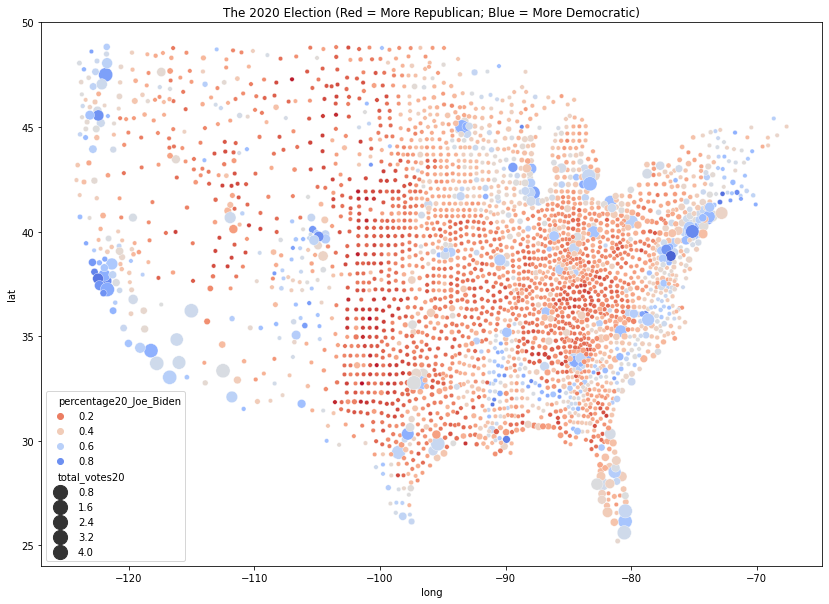

In [8]:
# removing counties from hawaii and alaska for making a better map
df_mainland = df[~df["state"].isin(["AK", "HI"])]

plt.figure(figsize = (14,10))
sns.scatterplot(data = df_mainland, x = "long", y = "lat", hue = "percentage20_Joe_Biden", size = "total_votes20", 
                sizes = (20, 200), size_norm = (10000, 800000), hue_norm = (0.031,0.944), palette = "coolwarm_r")
plt.title("The 2020 Election (Red = More Republican; Blue = More Democratic)");

It seems that Seeing this, it seems that the cities with high opulation are more inclined towards Democrats. Whereas the rural population is more inclined towards Republicans.

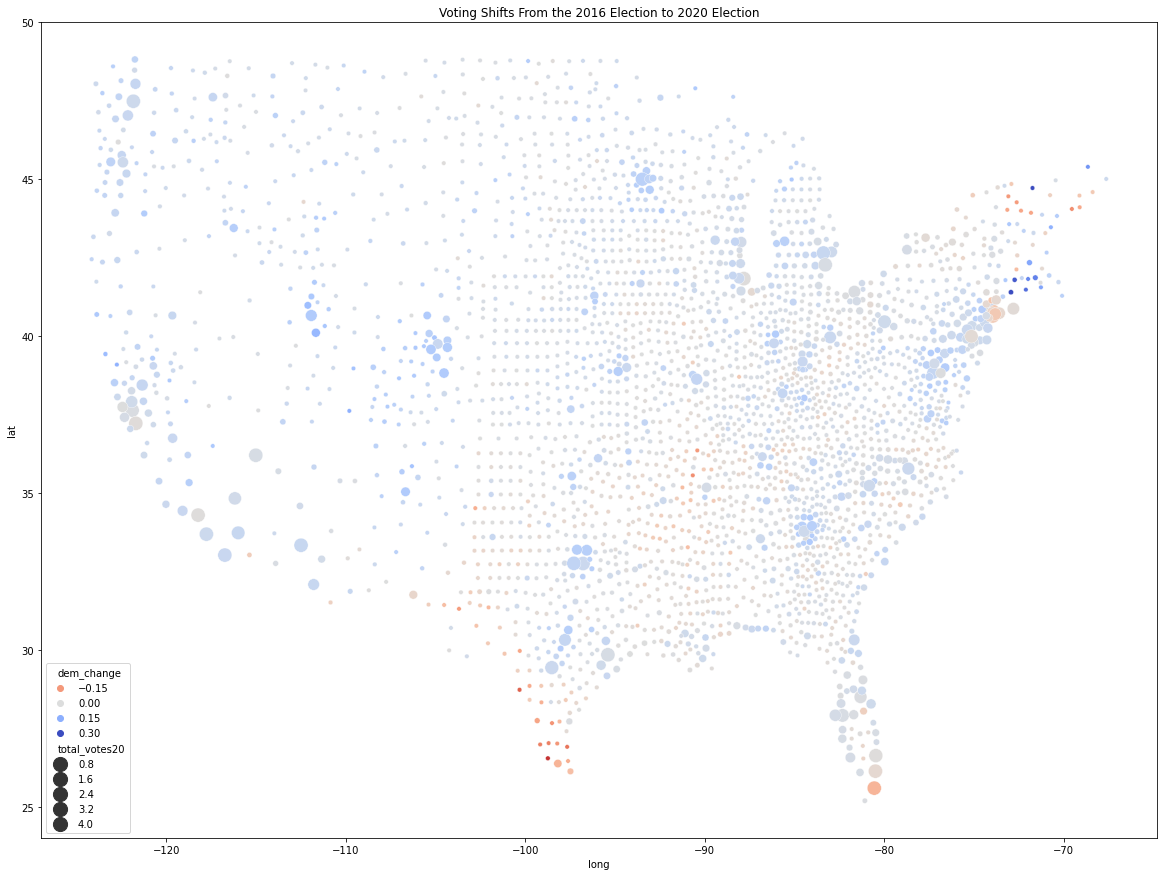

In [9]:
plt.figure(figsize = (20,15))
sns.scatterplot(data = df_mainland, x = "long", y = "lat", hue = "dem_change", size = "total_votes20", sizes = (20, 200),
                size_norm = (10000, 800000), palette = "coolwarm_r", hue_norm=(-0.3, 0.3))
plt.title("Voting Shifts From the 2016 Election to 2020 Election");

Text(0.5, 1.0, 'Voting Shifts From the 2016 Election to 2020 Election')

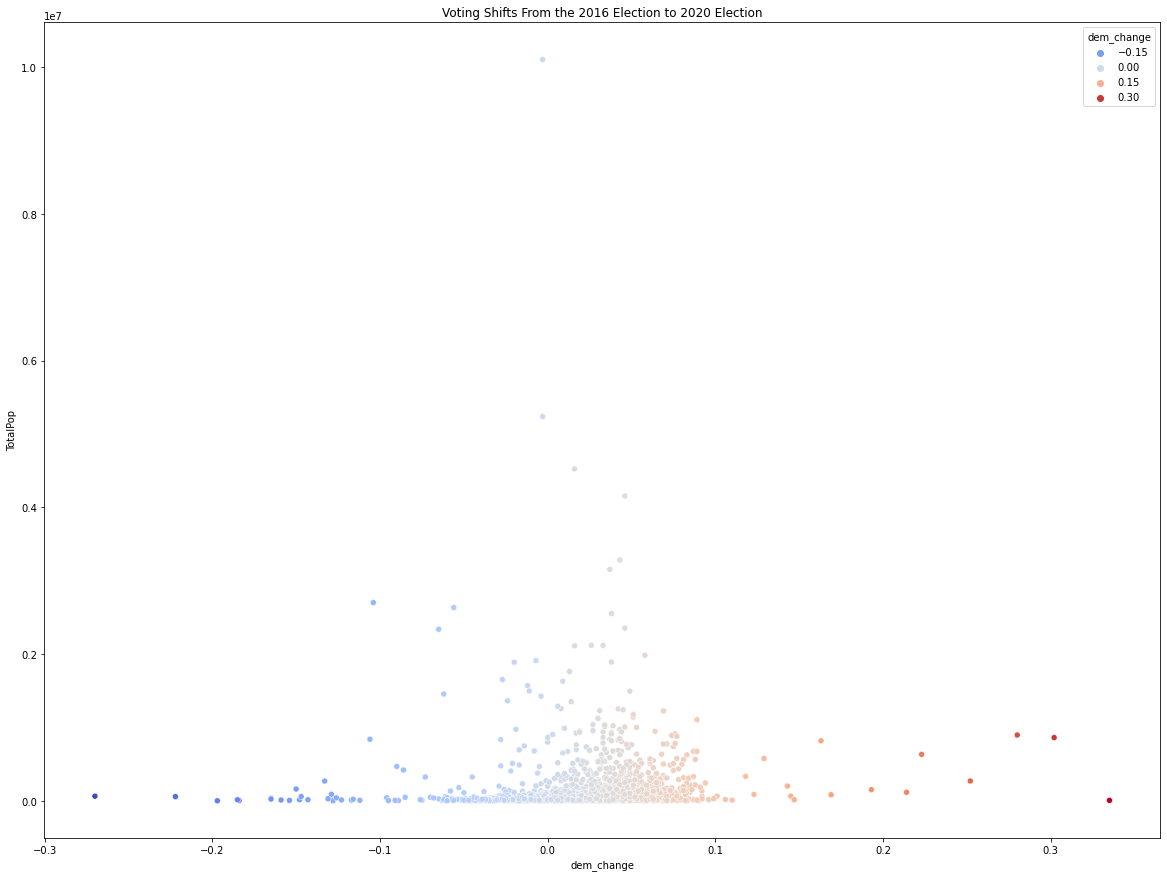

In [10]:
plt.figure(figsize = (20,15))
sns.scatterplot(data = df, x = "dem_change", y = "TotalPop", hue = "dem_change", palette = "coolwarm", sizes=(10,200))
plt.title("Voting Shifts From the 2016 Election to 2020 Election")

It seems democrats continued their dominance in urban areas and republicans in rural areas. Trump's 2020 gains in rural America is offset by Biden's urban dominance. It also seems that in rural and sub-urban areas there is minute shift from republicans to democrats.

https://www.brookings.edu/research/bidens-victory-came-from-the-suburbs/

Text(0.5, 1.0, 'Voting Shifts From the 2016 Election to 2020 Election')

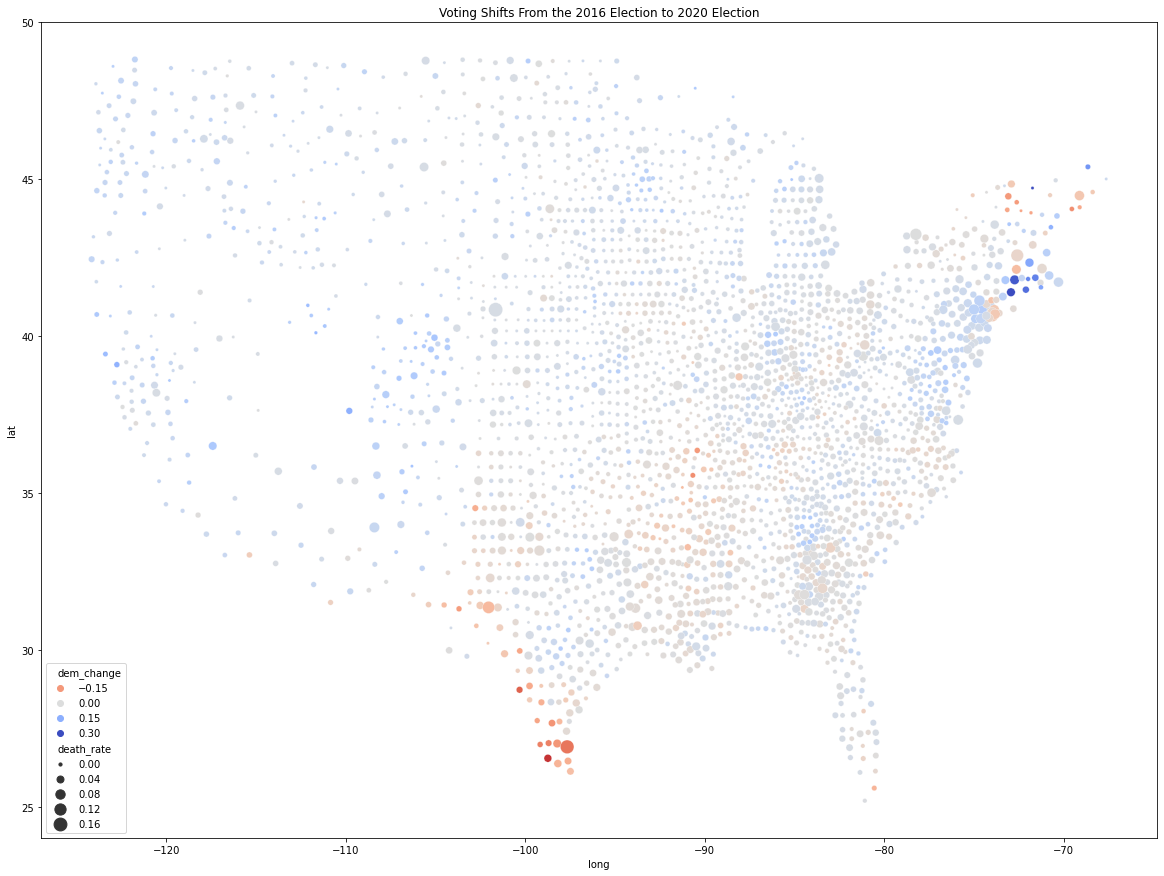

In [11]:
plt.figure(figsize = (20,15))
sns.scatterplot(data = df_mainland, x = "long", y = "lat", hue = "dem_change", size = "death_rate", sizes=(10,200),palette = "coolwarm_r", hue_norm=(-0.3, 0.3))
plt.title("Voting Shifts From the 2016 Election to 2020 Election")

Text(0.5, 1.0, 'Voting Shifts From the 2016 Election to 2020 Election')

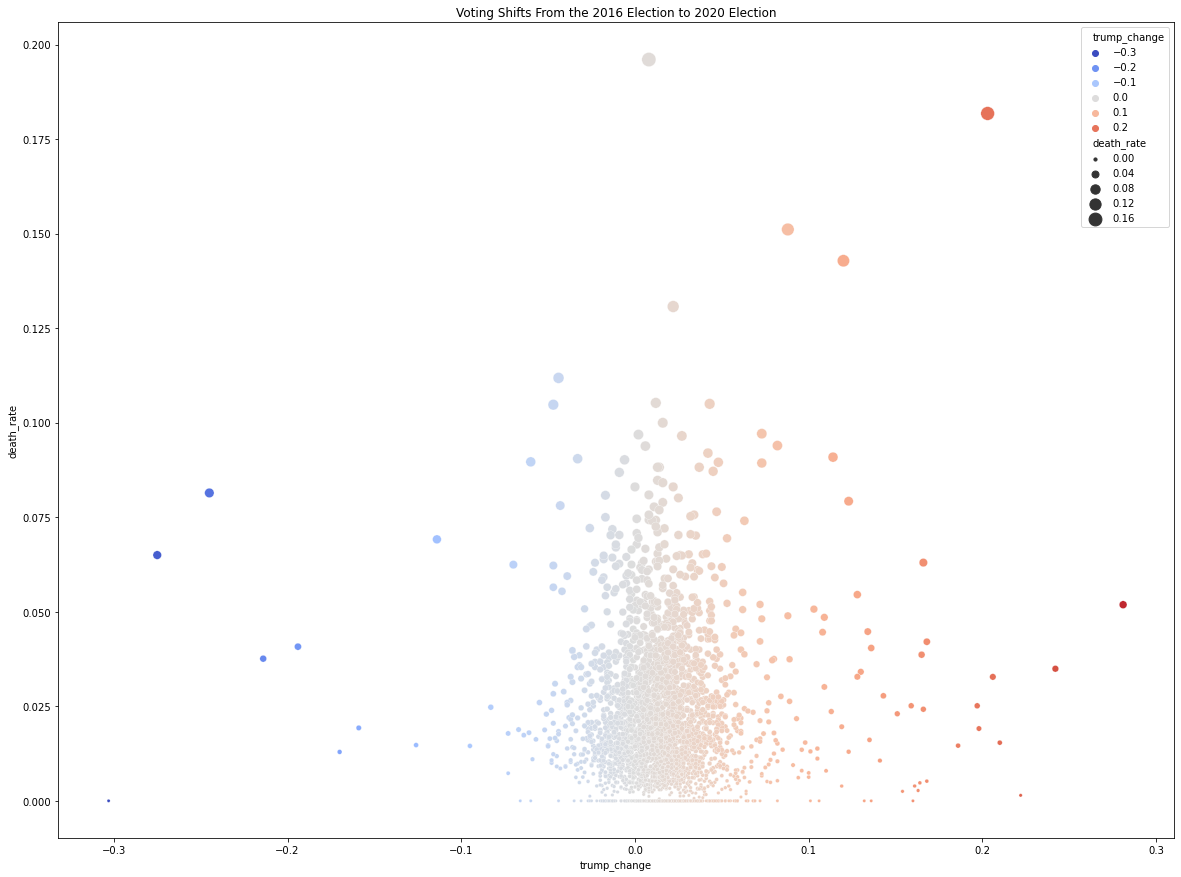

In [12]:
plt.figure(figsize = (20,15))
sns.scatterplot(data = df, x = "trump_change", y = "death_rate", hue = "trump_change", size = "death_rate",palette = "coolwarm", sizes=(10,200), hue_norm=(-0.3, 0.3))
plt.title("Voting Shifts From the 2016 Election to 2020 Election")

It can also be seen that counties where Trump received the most votes by a massive margin have a higher death rate than counties where President Joe Biden won in a relative landslide. It was speculated that the salience of the pandemic will be a major problem for Trump's electoral campaign because an overwhelming number of voters judged that he had mishandled the crisis. why i am not surprised, huh.
 
https://www.usnews.com/news/health-news/articles/2022-02-03/counties-that-voted-for-trump-have-higher-covid-death-rates

In [13]:
sum(df["dem_change"]>0)

2123

Text(0.5, 1.0, 'Voting Shifts From the 2016 Election to 2020 Election')

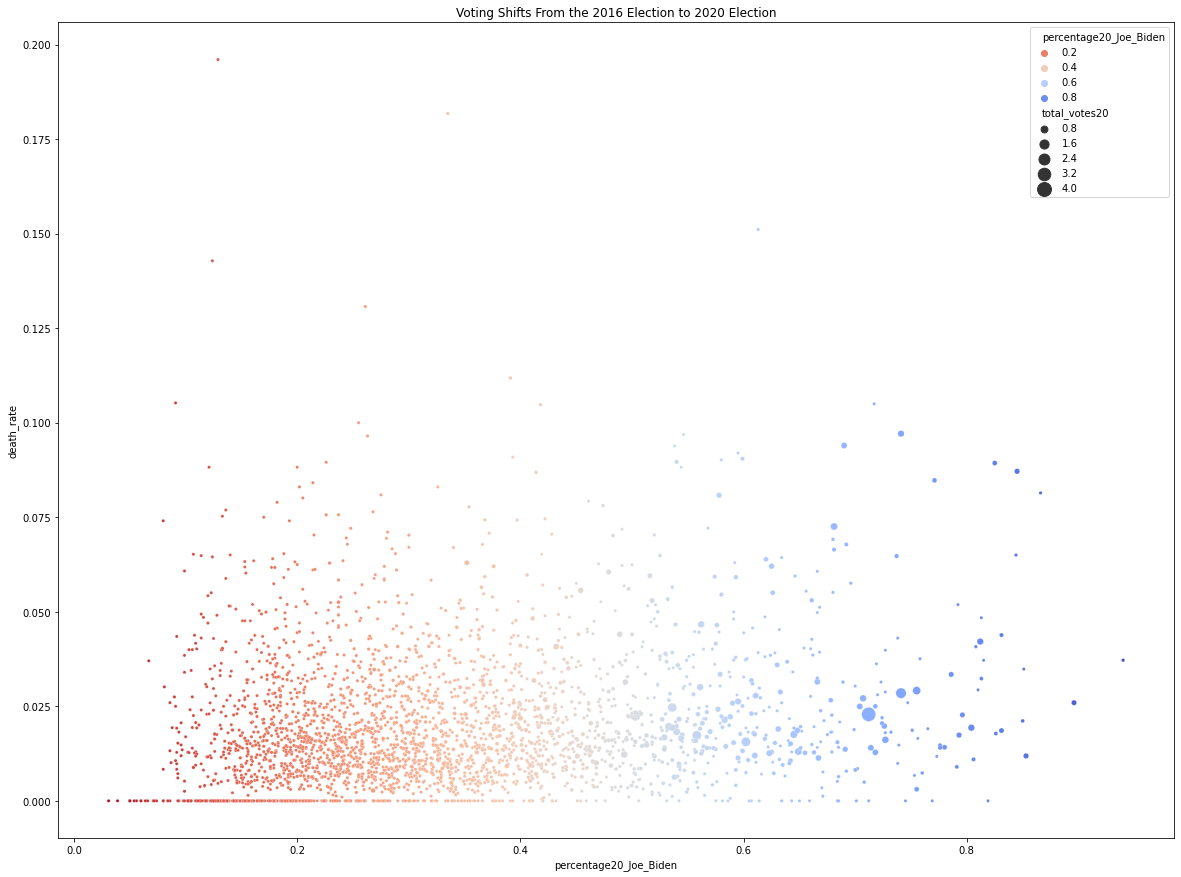

In [14]:
plt.figure(figsize = (20,15))
sns.scatterplot(data = df, x = "percentage20_Joe_Biden", y = "death_rate", hue = "percentage20_Joe_Biden", size = "total_votes20", sizes=(10,200),palette = "coolwarm_r")
plt.title("Voting Shifts From the 2016 Election to 2020 Election")

Text(0.5, 1.0, 'Voting Shifts From the 2016 Election to 2020 Election')

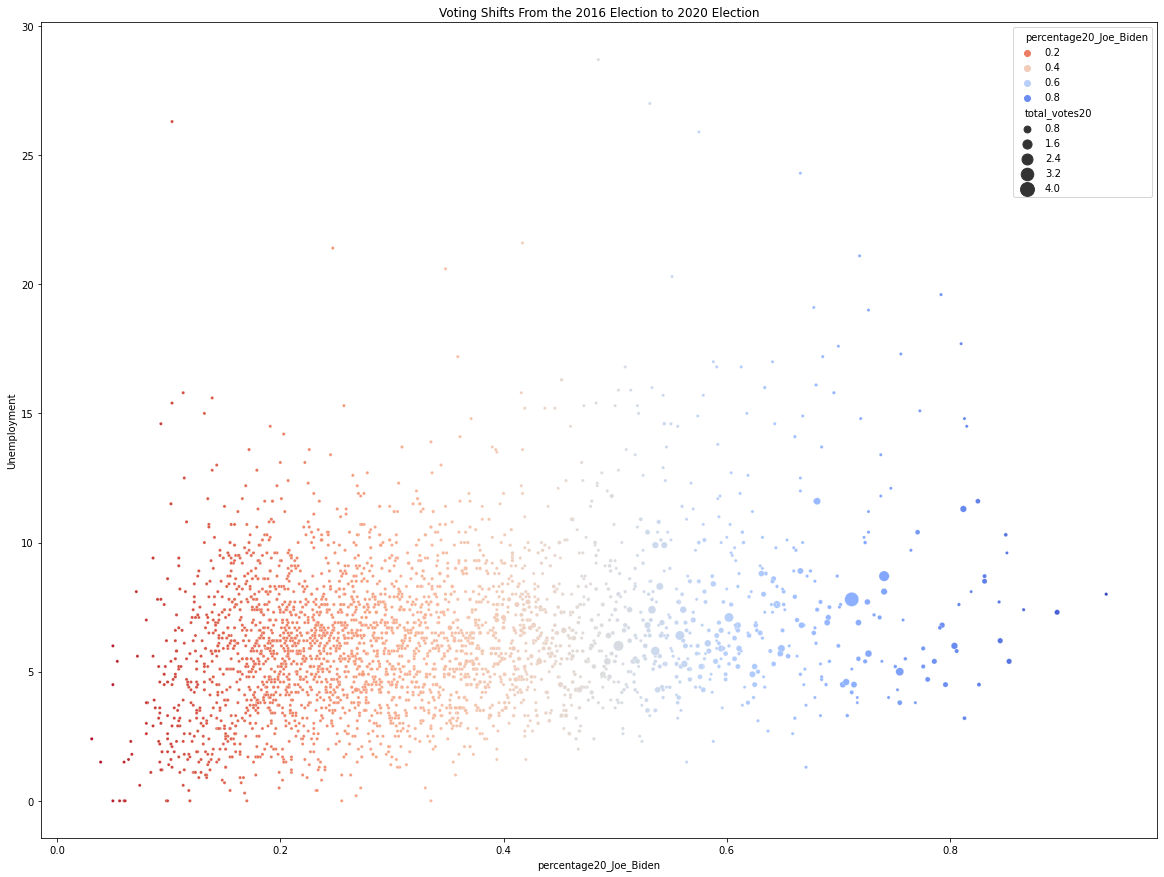

In [15]:
plt.figure(figsize = (20,15))
sns.scatterplot(data = df, x = "percentage20_Joe_Biden", y = "Unemployment", hue = "percentage20_Joe_Biden", size = "total_votes20", sizes=(10,200),palette = "coolwarm_r")
plt.title("Voting Shifts From the 2016 Election to 2020 Election")

There seems to be small trend between unemployment ratio and vote precentage for biden. It seems that counties that have higher unemployment rate, have high Democratic vote share.


Text(0.5, 1.0, 'Voting Shifts From the 2016 Election to 2020 Election')

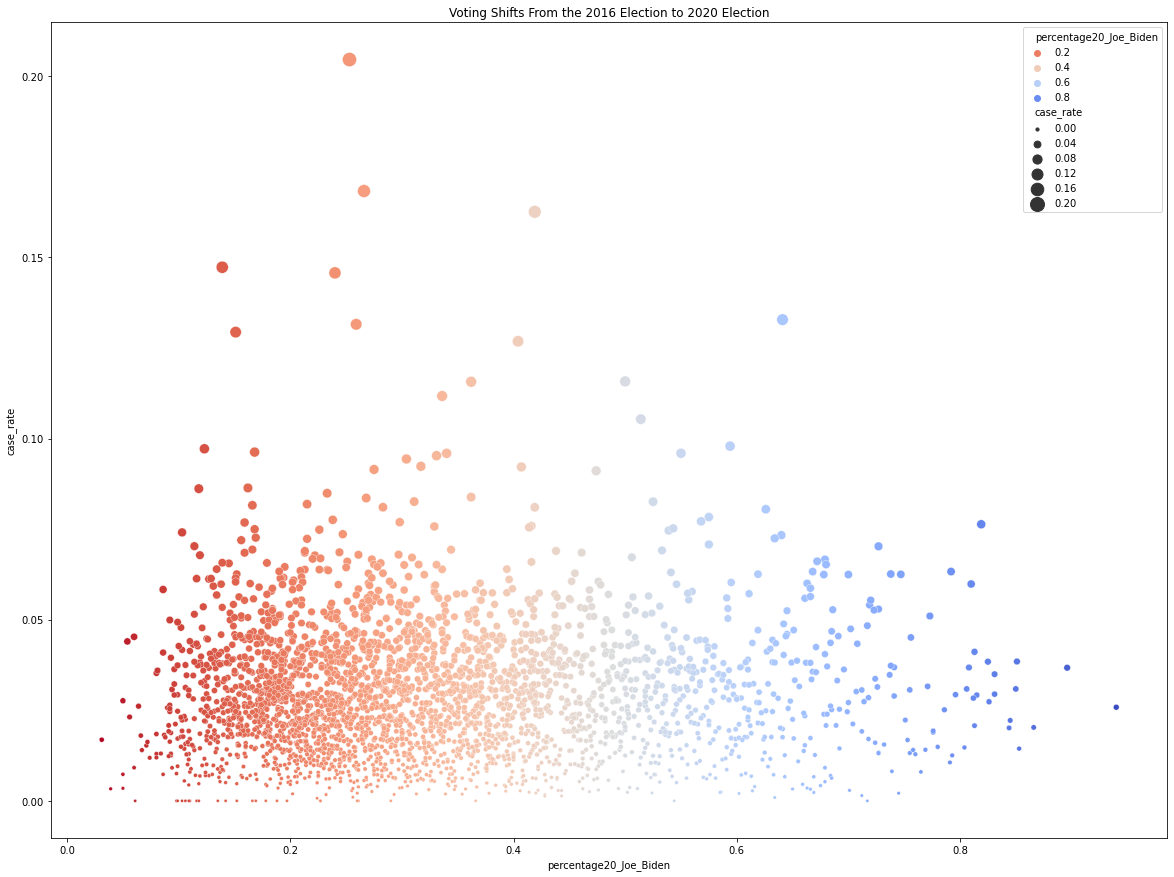

In [16]:
plt.figure(figsize = (20,15))
sns.scatterplot(data = df, x = "percentage20_Joe_Biden", y = "case_rate", hue = "percentage20_Joe_Biden", size = "case_rate", sizes=(10,200),palette = "coolwarm_r")
plt.title("Voting Shifts From the 2016 Election to 2020 Election")

Case rate vs Vote share seems to follow the same trend as Death rate vs Vote Share.

Text(0.5, 1.0, 'Voting Shifts From the 2016 Election to 2020 Election')

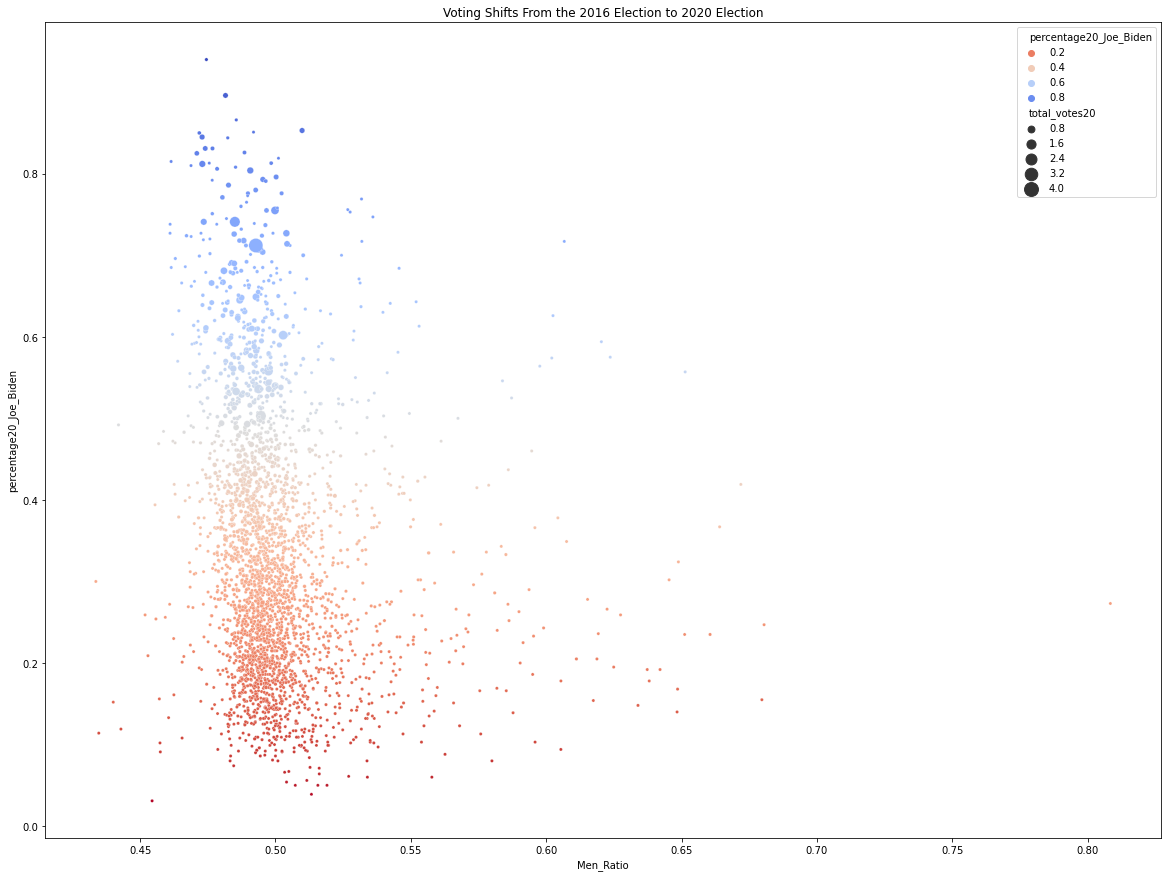

In [17]:
plt.figure(figsize = (20,15))
sns.scatterplot(data = df, x = "Men_Ratio", y = "percentage20_Joe_Biden", hue = "percentage20_Joe_Biden", size = "total_votes20", sizes=(10,200),palette = "coolwarm_r")
plt.title("Voting Shifts From the 2016 Election to 2020 Election")

It is clear from the plot above that the counties with higher Mem% are republican dominated. From this we can assume that men are more inclined towards republicans then women.

https://www.economist.com/united-states/2018/07/21/male-voters-are-sticking-with-the-republican-party

Text(0.5, 1.0, 'Voting Shifts From the 2016 Election to 2020 Election')

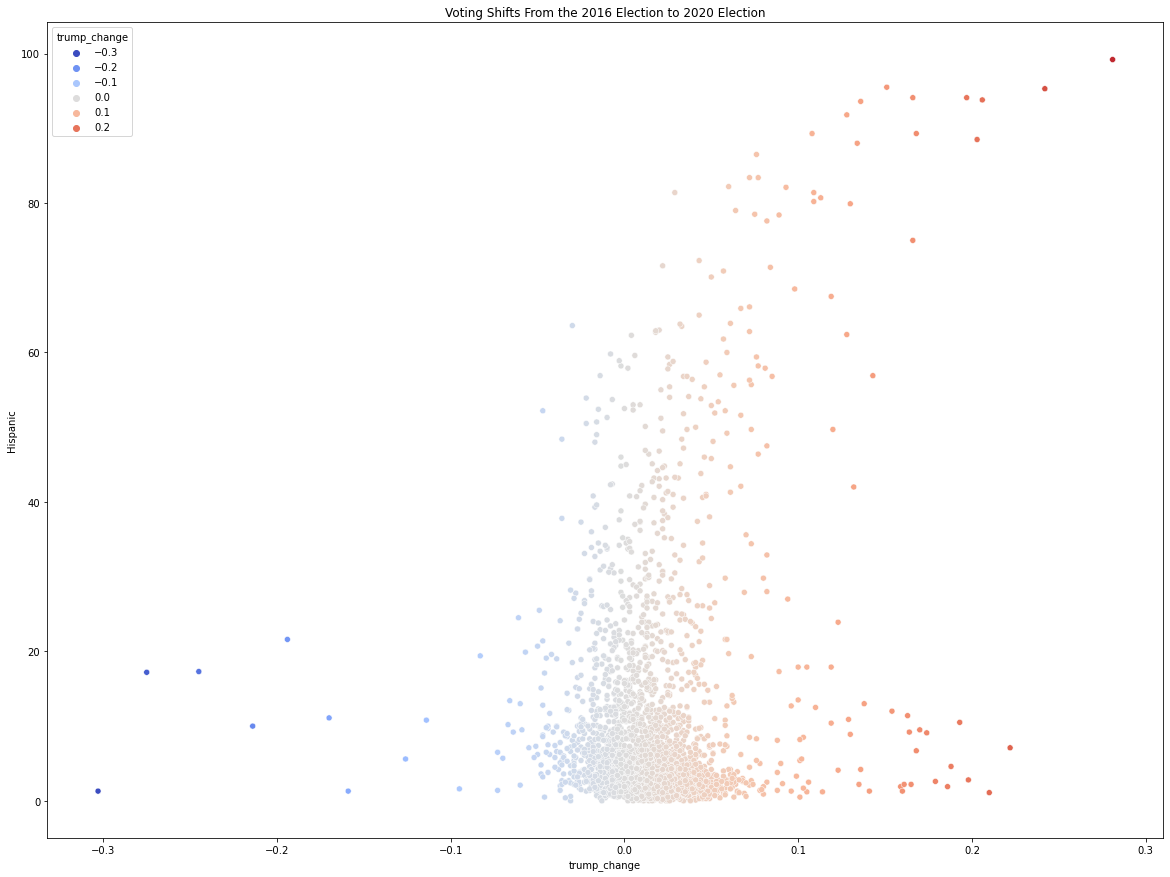

In [18]:
plt.figure(figsize = (20,15))
sns.scatterplot(data = df, x = "trump_change", y = "Hispanic", hue = "trump_change",palette = "coolwarm", sizes=(10,200), hue_norm=(-0.3, 0.3))
plt.title("Voting Shifts From the 2016 Election to 2020 Election")

Text(0.5, 1.0, 'Voting Shifts From the 2016 Election to 2020 Election')

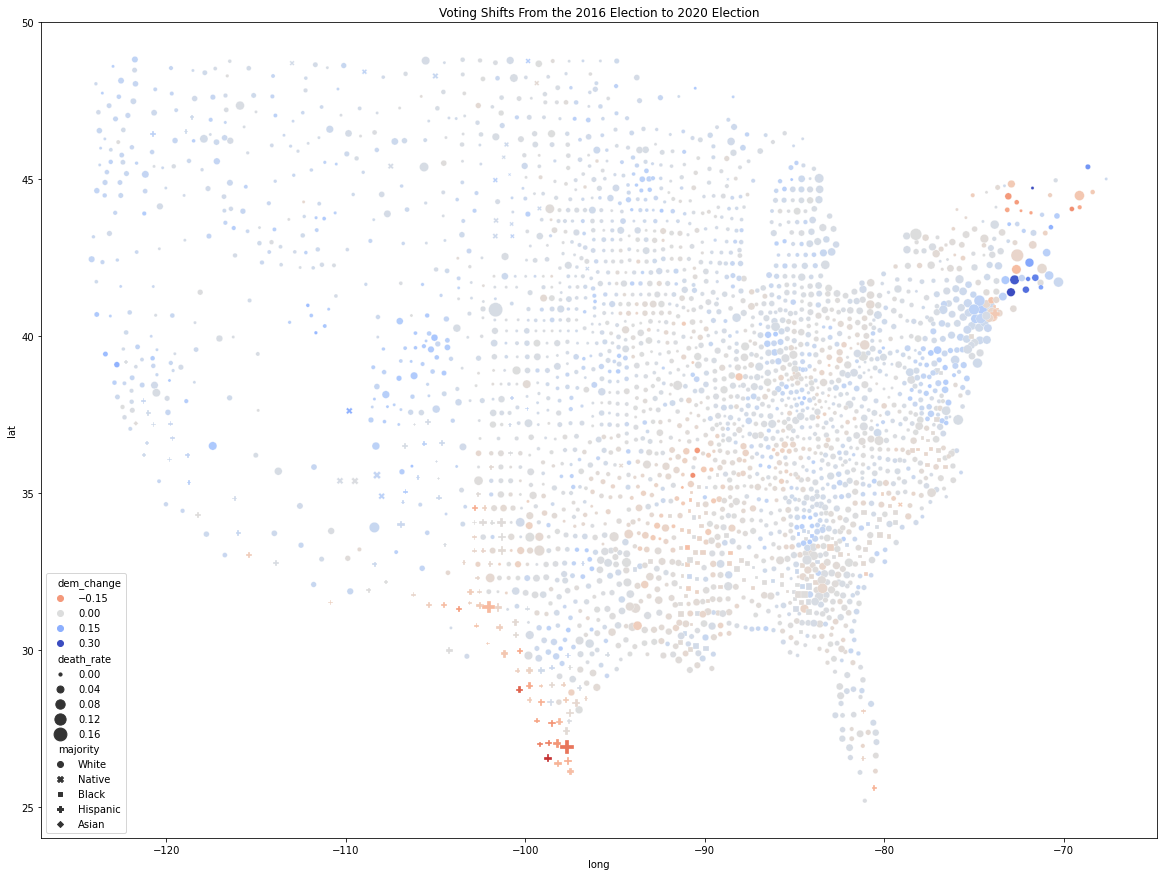

In [19]:
plt.figure(figsize = (20,15))
sns.scatterplot(data = df_mainland, x = "long", y = "lat", hue = "dem_change", size = "death_rate", style='majority',sizes=(10,200),palette = "coolwarm_r", hue_norm=(-0.3, 0.3))
plt.title("Voting Shifts From the 2016 Election to 2020 Election")

In [20]:
from matplotlib.ticker import PercentFormatter

def Political_affection(x_, y1_, y2_):
    plt.figure(figsize=(15, 8))
    ax = sns.barplot(x=x_, y=y1_, data=df, ci=None)
    width_scale = 0.45
    for bar in ax.containers[0]:
        bar.set_width(bar.get_width() * width_scale)
    ax.yaxis.set_major_formatter(PercentFormatter(1))

    ax2 = ax.twinx()
    sns.barplot(x=x_, y=y2_, data=df, alpha=0.7, hatch='xx', ax=ax2, ci=None)
    for bar in ax2.containers[0]:
        x = bar.get_x()
        w = bar.get_width()
        bar.set_x(x + w * (1- width_scale))
        bar.set_width(w * width_scale)

    plt.show()

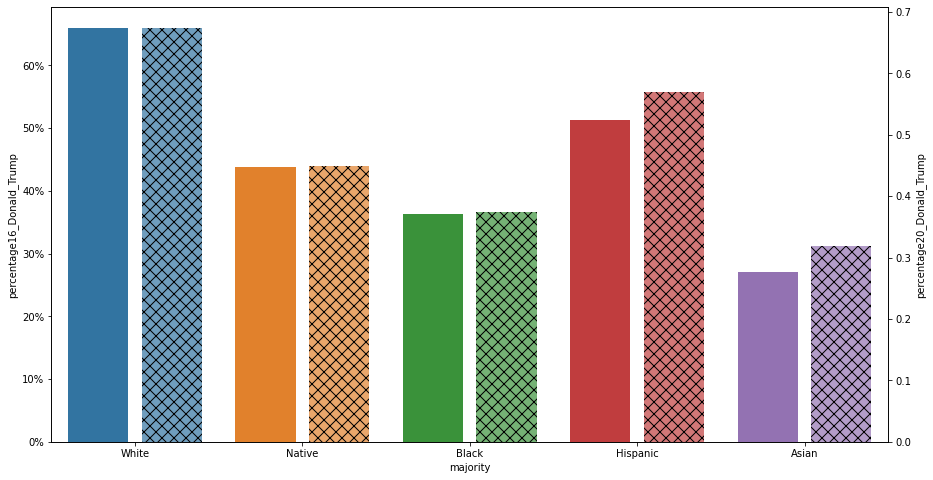

In [21]:
Political_affection('majority', 'percentage16_Donald_Trump', 'percentage20_Donald_Trump')

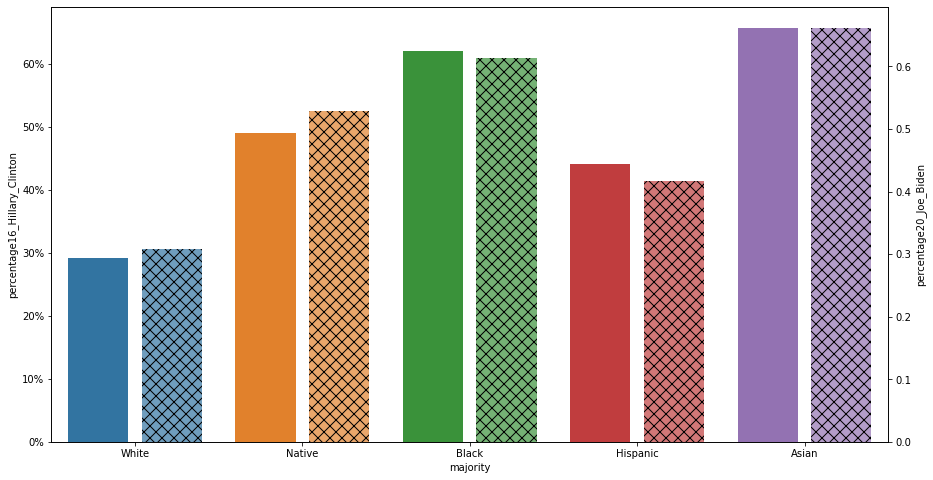

In [22]:
Political_affection('majority', 'percentage16_Hillary_Clinton', 'percentage20_Joe_Biden')

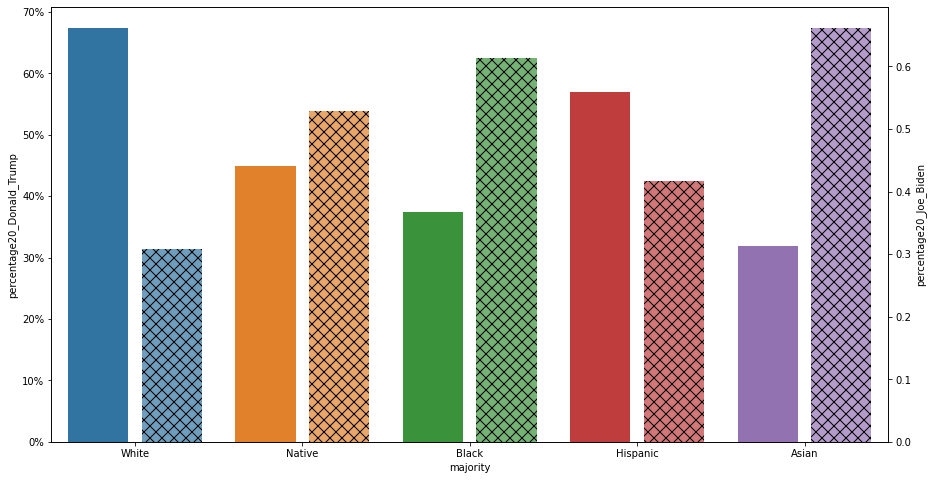

In [23]:
Political_affection('majority', 'percentage20_Donald_Trump', 'percentage20_Joe_Biden')

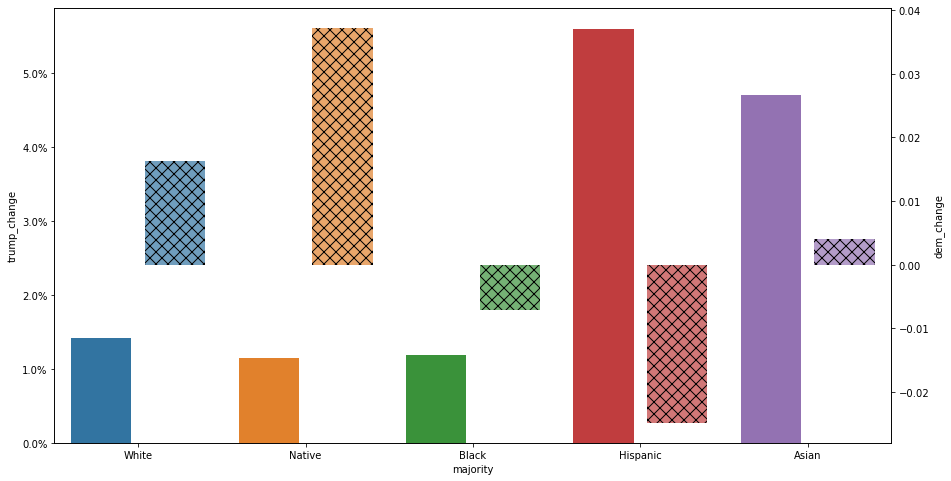

In [24]:
Political_affection('majority', 'trump_change', 'dem_change')

It is clear form the plots above that trump is more popular in white and latino communities. This divides seems to be deepening further in 2020 elections. Trump had majority in almost 70% of the white dominant counties. He has also become quite more popular in latino community compared to 2016. African Americans have always be loyal democrats. But democtats popularity among African Americans seems to decreased in recent elections. Same goes for asian community too. Native vote share has also seen a huge jump in favour of biden in 2020 election.

https://www.nbcnews.com/news/nbcblk/black-men-drifted-democrats-toward-trump-record-numbers-polls-show-n1246447
https://www.nytimes.com/2021/04/02/us/politics/trump-latino-voters-2020.html

# Building ANN Model

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [26]:
# Spiltting dataset into train, validation and test sets
train, Test = train_test_split(df, test_size=0.25, random_state=42)
val, test = train_test_split(df, test_size=0.4, random_state=42)

In [27]:
df.columns

Index(['Unnamed: 0', 'county', 'state', 'percentage16_Donald_Trump',
       'percentage16_Hillary_Clinton', 'total_votes16', 'votes16_Donald_Trump',
       'votes16_Hillary_Clinton', 'percentage20_Donald_Trump',
       'percentage20_Joe_Biden', 'total_votes20', 'votes20_Donald_Trump',
       'votes20_Joe_Biden', 'lat', 'long', 'cases', 'deaths', 'TotalPop',
       'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr', 'IncomePerCap',
       'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit',
       'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed',
       'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork',
       'Unemployment', 'turnout_change', 'perc_turnout_change', 'trump_change',
       'dem_change', 'case_rate', 'death_rate', 'Men_Ratio', 'Employed%',
       'majority'],
      dtype='object')

In [28]:
# Filtering dataset for training the model. Removing columns that might not be useful for training model.

new_cols = ['TotalPop','Employed', 'Hispanic', 'White', 'Black', 
                  'Native', 'Asian', 'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr', 
                  'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional', 
                  'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit',
                  'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'PrivateWork', 
                  'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment','Men_Ratio', 'Employed%',
                  'percentage16_Donald_Trump','percentage16_Hillary_Clinton','total_votes16',
                  'votes16_Donald_Trump','votes16_Hillary_Clinton', 'cases', 'deaths']

X_train = train[new_cols]
X_test = test[new_cols]
X_val = val[new_cols]

In [29]:
import tensorflow as tf
from tensorflow import keras

In [30]:
# Defining a ann model
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer([X_train.shape[1],]))
    model.add(keras.layers.BatchNormalization())
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, metrics=["accuracy"], loss='mean_squared_error')
    return model

In [31]:
# Importing optuna for hyperparameter tuning
import optuna

In [32]:
from keras.backend import clear_session
from sklearn.metrics import mean_squared_error

#Defining tuning objective

class Objective:
    
    def __init__(self):
        self.best_booster = None
        self._booster = None

    
    def __call__(self, trial):

        clear_session()
        
        # tunable parameters
        lr = trial.suggest_float("lr", 3e-4,3e-2, log=True)
        n_hidden = trial.suggest_int("n_hidden", 1,4, log=True)
        n_neurons = trial.suggest_int("n_neurons", 8,128, log=True)



        # building ann model
        model = build_model(n_hidden, n_neurons, lr)

        # fitting the model
        model.fit(
            np.asarray(X_train).astype("float32"),
            np.asarray(train['percentage20_Donald_Trump']).astype("float32"),
            epochs=15, validation_data=(X_val, val['percentage20_Donald_Trump']), verbose=0)

        self._booster = model
        
        # prediction and erroe on valdiation set
        val_preds = model.predict(X_val)
        val_rmse = mean_squared_error(val['percentage20_Donald_Trump'], val_preds, squared=False)


        return val_rmse
    
    # callback to save the best model
    def callback(self, study, trial):
        if study.best_trial == trial:
            self.best_booster = self._booster

In [33]:
objective = Objective()

study = optuna.create_study(pruner=optuna.pruners.MedianPruner(n_warmup_steps=10),
                            direction="minimize", study_name="Keras Regressor")

study.optimize(objective, n_trials=25, callbacks=[objective.callback])

[I 2022-03-30 20:42:01,406] A new study created in memory with name: Keras Regressor
[I 2022-03-30 20:42:11,576] Trial 0 finished with value: 0.07785397768012116 and parameters: {'lr': 0.001101478578406543, 'n_hidden': 1, 'n_neurons': 66}. Best is trial 0 with value: 0.07785397768012116.
[I 2022-03-30 20:42:18,127] Trial 1 finished with value: 0.10668950634324303 and parameters: {'lr': 0.0003200987019001244, 'n_hidden': 3, 'n_neurons': 14}. Best is trial 0 with value: 0.07785397768012116.
[I 2022-03-30 20:42:23,802] Trial 2 finished with value: 0.033780671332217745 and parameters: {'lr': 0.02661553901150108, 'n_hidden': 1, 'n_neurons': 28}. Best is trial 2 with value: 0.033780671332217745.
[I 2022-03-30 20:42:30,248] Trial 3 finished with value: 0.06649652861498505 and parameters: {'lr': 0.0012929506907795817, 'n_hidden': 1, 'n_neurons': 111}. Best is trial 2 with value: 0.033780671332217745.
[I 2022-03-30 20:42:36,288] Trial 4 finished with value: 0.03492914213130224 and parameters: {

In [34]:
print("Best trial:")
trial = study.best_trial

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

best_model = objective.best_booster

Best trial:
  Params: 
    lr: 0.014539235698067912
    n_hidden: 2
    n_neurons: 38


In [35]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 41)               164       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 38)                1596      
                                                                 
 dense_1 (Dense)             (None, 38)                1482      
                                                                 
 dense_2 (Dense)             (None, 1)                 39        
                                                                 
Total params: 3,281
Trainable params: 3,199
Non-trainable params: 82
_________________________________________________________________


In [36]:
pred = best_model.predict(X_test)

In [37]:
mean_squared_error(test['percentage20_Donald_Trump'], pred)

0.0009606085062351315